In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import random
from sklearn.linear_model import LinearRegression

# 1. Linear regression with 1-dimensional input

## 1-1. Making an artificial dataset

In [2]:
x = []
for i in range(50):
    x.append(i)

print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [3]:
# List Comprehension
x = [i for i in range(50)]
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [4]:
y = [2 * j + random.normalvariate(0,10) for j in range(50)]
print(y)

[-3.9632763331526775, -8.663640866987175, 6.656359260622049, 9.395722889732696, -3.0675291791131887, 7.395804400032229, 26.42248251002977, 25.382293858395933, 19.775623120214235, 16.556758155429527, 11.838390612844602, 30.234154018668374, 39.2242315817812, 32.147074292015056, 27.942183482533146, 10.79214127230103, 33.29710061202584, 27.943049103515165, 23.081116297910164, 29.730205280328487, 48.6701865708387, 56.25204534238384, 47.29327951318363, 28.065265972483605, 55.639286538031456, 50.994313751449376, 44.10736975060871, 54.28565026701665, 58.258512632784004, 61.5833070828602, 60.643059355790314, 72.00826242056158, 67.48800876311212, 78.61597180336605, 84.43086057248354, 71.49468111574576, 80.2956572572827, 74.57177693042857, 71.05225133398437, 77.94899431731194, 75.90703517449086, 76.56144364838251, 74.34028668353358, 80.42846771061514, 76.35759544617399, 80.06781198417808, 90.70841493664267, 108.61192570133005, 99.293543822025, 107.63470161763506]


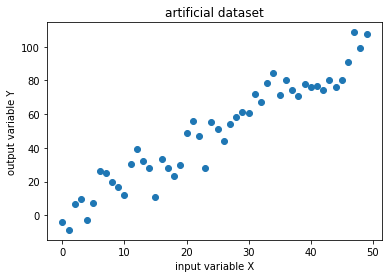

In [5]:
plt.scatter(x,y)
plt.xlabel('input variable X')
plt.ylabel('output variable Y')
plt.title('artificial dataset')
plt.show()

## 1-2. Linear regression from scratch

In [6]:
def mean(values):
    return sum(values) / len(values)

In [7]:
def beta(x, y):
    # Calculate beta_1
    covariance = 0
    variance_x = 0
    num_points = len(x)
    for i in range(num_points):
        covariance += (x[i] - mean(x)) * (y[i] - mean(y))
        variance_x += pow(x[i] - mean(x), 2)
    # covariance = covariance / num_points
    # variance_x = variance_x / num_points
    beta_1 = covariance / variance_x
    
    # Calculate beta_0
    beta_0 = mean(y) - beta_1 * mean(x)
    
    return [beta_0, beta_1]

In [8]:
beta_v1 = beta(x, y)
print(beta_v1)

[0.07593143121310675, 2.017905012918519]


## 1-3. Linear regression using numpy

In [9]:
np.cov(x, y, ddof = 0)[0,1]

420.2287189402816

In [10]:
beta_1 = np.cov(x, y, ddof = 0)[0,1] / np.var(x)
beta_0 = np.mean(y) - beta_1 * np.mean(x)
beta_v2 = [beta_0, beta_1]
print(beta_v2)

[0.07593143121309964, 2.017905012918519]


In [11]:
print(beta_v1)
print(beta_v2)

[0.07593143121310675, 2.017905012918519]
[0.07593143121309964, 2.017905012918519]


## 1-4. Linear regression using scikit-learn

In [12]:
print(type(x))
print(type(y))

<class 'list'>
<class 'list'>


In [13]:
train_x = np.array(x)
train_y = np.array(y)

print(type(train_x))
print(type(train_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:
print(x)
print(train_x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [15]:
# What happened?
model = LinearRegression()
model.fit(train_x, train_y)
print(model.coef_)
print(model.intercept_)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
train_x

In [ ]:
train_x.shape

In [ ]:
test = train_x.reshape(-1,1)
print(test.shape)

In [ ]:
model = LinearRegression()
model.fit(train_x.reshape(-1, 1), train_y)

In [ ]:
?LinearRegression

In [ ]:
model.intercept_

In [ ]:
model.coef_

In [ ]:
model.coef_[0]

In [ ]:
beta_v3 = [model.intercept_, model.coef_[0]]
print(beta_v3)

## 1-5. Compare results and visualize the regression line

In [ ]:
print('LR_v1:\t', beta_v1)
print('LR_v2:\t', beta_v2)
print('LR_v3:\t', beta_v3)

In [ ]:
plt.scatter(train_x, train_y, color = 'black', alpha = 0.3)
plt.xlabel('input variable X')
plt.ylabel('output variable Y')
plt.title('artificial dataset')
plt.plot(train_x, model.predict(train_x.reshape(-1, 1)), color = 'red', linewidth=3, linestyle = '--')
plt.show()

# 2. Linear regression with 2-dimensional input

## 2-1. Loading the "advertising" dataset
- Advertising dataset from **"An Introduction to Statistical Learning"**
- http://www-bcf.usc.edu/~gareth/ISL/

In [ ]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [ ]:
data.head(5)

In [ ]:
data.shape

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['TV'], data['radio'], data['sales'], c='b', marker='o', alpha = 0.3)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

plt.show()

## 2-2. Linear regression using numpy

In [ ]:
data[['TV', 'radio']]

In [ ]:
X = data[['TV', 'radio']]
y = data['sales']

In [ ]:
X.head(5)

In [ ]:
# Converting dataframe to array
X = X.values
y = y.values

In [ ]:
X

In [ ]:
np.ones(len(X))

In [ ]:
# X의 첫 번째 열에 모든 값이 1인 array를 넣기
X = np.c_[np.ones(len(X)), X]

In [ ]:
X

In [ ]:
beta_v1 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(beta_v1)

## 2-3. Linear regression using scikit-learn

In [ ]:
X = data[['TV', 'radio']]
y = data['sales']

In [ ]:
X.head(5)

In [ ]:
model = LinearRegression()
model.fit(X, y)

In [ ]:
model.intercept_

In [ ]:
model.coef_

In [ ]:
beta_v2 = model.coef_
beta_v2 = np.insert(beta_v2, 0, model.intercept_)
print(beta_v2)

## 2-4. Compare results and visualize the regression plane

In [ ]:
print('LR_v1:\t', beta_v1)
print('LR_v2:\t', beta_v2)

In [ ]:
X = data[['TV', 'radio']].values
y = data['sales'].values
y_hat = model.predict(X)

In [ ]:
error = y - y_hat
plt.hist(error)

In [ ]:
# error의 절대값이 3 이상인 데이터포인트 인덱스에 True 넣기
index = np.where(np.abs(error) >= 3, True, False)

In [ ]:
index

In [ ]:
plt.style.use('seaborn-pastel')

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')

# Error의 절대값이 3이 넘지 않는 데이터포인트는 파란색('b'), 그렇지 않은 포인트는 빨간색('r')로 표시
ax.scatter(X[~index,0], X[~index,1], y[~index], c='b', marker='o', alpha = 0.3)
ax.scatter(X[index,0], X[index,1], y[index], c='r', marker='o', alpha = 0.5)

# Regression plane를 x1와 x2에 대한 함수로 정의
plane = lambda x1, x2: beta_v2[0] + beta_v2[1] * x1 + beta_v2[2] * x2 

# Regression plane의 영역을 (대충) 정의한 코드
grid_x1, grid_x2 = np.mgrid[-30:350, 0:50]
ax.plot_surface(grid_x1, grid_x2, plane(grid_x1, grid_x2), color = 'k', alpha = 0.1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

## 2-5. Multicollinearity (다중공선성)
- **Multicollinearity** (also collinearity) is a phenomenon in which two or more predictor variables in a multiple regression model are highly correlated, meaning that one can be linearly predicted from the others with a substantial degree of accuracy. (from Wikipedia)
- Let's add a variable **'2 * TV'**

In [ ]:
X = data[['TV', 'radio']]
y = data['sales']

# Converting dataframe to array
X = X.values
y = y.values

# X의 첫 번째 열에 모든 값이 1인 array를 넣기
# X의 마지막 열에 'TV' 변수값의 2배인 열을 추가
X = np.c_[np.ones(len(X)), X, 2 * X[:,0]]

In [ ]:
X[0:5,]

In [ ]:
# What happened?
beta_v3 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(beta_v3)

In [ ]:
np.corrcoef(X[:,1], X[:,3])

In [ ]:
model = LinearRegression()
model.fit(X, y)
beta_v4 = model.coef_
beta_v4 = np.insert(beta_v4, 0, model.intercept_)
print(beta_v4)
print(beta_v2)